In [77]:
import numpy as np

In [78]:
input_size=3  # no of features
layers=[4,3] # no of neurons in first and second layer
output_size=2

In [79]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

# takes an array filled with output values and returns a same sized array filled with respective probabilities 

In [144]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model={}
        
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model=model
    
    def forward(self,x):
        w1,w2,w3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1=np.dot(x,w1) + b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,w2) + b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,w3) + b3
        y_=softmax(z3)
        
        self.activation_output = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        w1,w2,w3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m=x.shape[0]
        
        a1,a2,y_=self.activation_output
        
        delta3 = y_-y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)/float(m)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,w3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)/float(m)
        
        delta1= (1-np.square(a1))*np.dot(delta2,w2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)/float(m)
        
        
        self.model['W1'] -=learning_rate*dw1
        self.model['b1'] -=learning_rate*db1
  
        self.model['W2'] -=learning_rate*dw2
        self.model['b2'] -=learning_rate*db2
        
        self.model['W3'] -=learning_rate*dw3
        self.model['b3'] -=learning_rate*db3
        
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        w1,w2,w3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_output
        
        print("w1:",w1.shape)
        print("a1:",a1.shape)
        print("w2:",w2.shape)
        print("a2:",a2.shape)
        print("w3:",w3.shape)
        print("y_:",y_.shape)
        
    

In [145]:
def loss(y_oht,p):
        l=-np.mean(y_oht*np.log(p))
        return l

def one_hot(y,depth):
        m=y.shape[0]
        y_oht = np.zeros((m,depth))
        y_oht[np.arange(m),y]=1
        
        return y_oht

In [146]:
w1=np.random.randn(input_size,layers[0])
print(w1)

[[-0.90729836  0.0519454   0.72909056  0.12898291]
 [ 1.13940068 -1.23482582  0.40234164 -0.68481009]
 [-0.87079715 -0.57884966 -0.31155253  0.05616534]]


In [147]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [148]:
X,Y = make_circles(n_samples=500, shuffle=True,noise=0.05,random_state=1,factor=0.8)

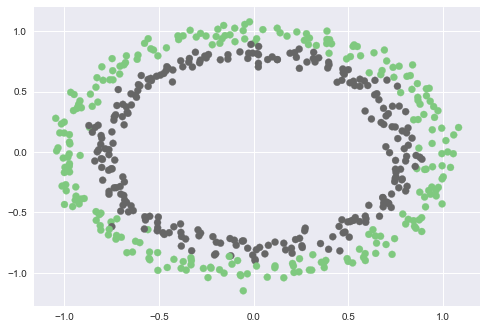

In [149]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [150]:
model = NeuralNetwork(input_size=2,layers=[10,4],output_size=2)

In [151]:
model.forward(X)

array([[0.07135496, 0.92864504],
       [0.0252705 , 0.9747295 ],
       [0.15439902, 0.84560098],
       [0.02590134, 0.97409866],
       [0.97423778, 0.02576222],
       [0.96419691, 0.03580309],
       [0.03741109, 0.96258891],
       [0.73047016, 0.26952984],
       [0.95510868, 0.04489132],
       [0.02219465, 0.97780535],
       [0.02827971, 0.97172029],
       [0.81149347, 0.18850653],
       [0.03740692, 0.96259308],
       [0.0268464 , 0.9731536 ],
       [0.06447007, 0.93552993],
       [0.96869361, 0.03130639],
       [0.95539586, 0.04460414],
       [0.41339302, 0.58660698],
       [0.10224504, 0.89775496],
       [0.14103553, 0.85896447],
       [0.24757086, 0.75242914],
       [0.04693912, 0.95306088],
       [0.04204106, 0.95795894],
       [0.96445179, 0.03554821],
       [0.028442  , 0.971558  ],
       [0.06121185, 0.93878815],
       [0.6861095 , 0.3138905 ],
       [0.02468014, 0.97531986],
       [0.8907949 , 0.1092051 ],
       [0.97606298, 0.02393702],
       [0.

In [152]:
model.summary()

w1: (2, 10)
a1: (500, 10)
w2: (10, 4)
a2: (500, 4)
w3: (4, 2)
y_: (500, 2)


In [153]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss=[]
    
    classes=2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_=model.forward(X)
        l=loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %0.4f"%(ix,l))
            
    return training_loss
    

In [156]:
losses=train(X,Y,model,500,0.001)

Epoch 0 Loss 0.3464
Epoch 1 Loss 0.3464
Epoch 2 Loss 0.3464
Epoch 3 Loss 0.3464
Epoch 4 Loss 0.3464
Epoch 5 Loss 0.3464
Epoch 6 Loss 0.3464
Epoch 7 Loss 0.3464
Epoch 8 Loss 0.3464
Epoch 9 Loss 0.3464
Epoch 10 Loss 0.3464
Epoch 11 Loss 0.3464
Epoch 12 Loss 0.3464
Epoch 13 Loss 0.3464
Epoch 14 Loss 0.3464
Epoch 15 Loss 0.3464
Epoch 16 Loss 0.3464
Epoch 17 Loss 0.3464
Epoch 18 Loss 0.3464
Epoch 19 Loss 0.3464
Epoch 20 Loss 0.3464
Epoch 21 Loss 0.3464
Epoch 22 Loss 0.3464
Epoch 23 Loss 0.3464
Epoch 24 Loss 0.3464
Epoch 25 Loss 0.3464
Epoch 26 Loss 0.3464
Epoch 27 Loss 0.3464
Epoch 28 Loss 0.3464
Epoch 29 Loss 0.3464
Epoch 30 Loss 0.3464
Epoch 31 Loss 0.3464
Epoch 32 Loss 0.3464
Epoch 33 Loss 0.3464
Epoch 34 Loss 0.3464
Epoch 35 Loss 0.3464
Epoch 36 Loss 0.3464
Epoch 37 Loss 0.3464
Epoch 38 Loss 0.3464
Epoch 39 Loss 0.3464
Epoch 40 Loss 0.3464
Epoch 41 Loss 0.3464
Epoch 42 Loss 0.3464
Epoch 43 Loss 0.3464
Epoch 44 Loss 0.3464
Epoch 45 Loss 0.3464
Epoch 46 Loss 0.3464
Epoch 47 Loss 0.3464
Ep

Epoch 462 Loss 0.3458
Epoch 463 Loss 0.3458
Epoch 464 Loss 0.3458
Epoch 465 Loss 0.3458
Epoch 466 Loss 0.3458
Epoch 467 Loss 0.3458
Epoch 468 Loss 0.3458
Epoch 469 Loss 0.3458
Epoch 470 Loss 0.3458
Epoch 471 Loss 0.3458
Epoch 472 Loss 0.3458
Epoch 473 Loss 0.3458
Epoch 474 Loss 0.3458
Epoch 475 Loss 0.3458
Epoch 476 Loss 0.3458
Epoch 477 Loss 0.3458
Epoch 478 Loss 0.3458
Epoch 479 Loss 0.3458
Epoch 480 Loss 0.3458
Epoch 481 Loss 0.3458
Epoch 482 Loss 0.3458
Epoch 483 Loss 0.3458
Epoch 484 Loss 0.3458
Epoch 485 Loss 0.3458
Epoch 486 Loss 0.3458
Epoch 487 Loss 0.3458
Epoch 488 Loss 0.3457
Epoch 489 Loss 0.3457
Epoch 490 Loss 0.3457
Epoch 491 Loss 0.3457
Epoch 492 Loss 0.3457
Epoch 493 Loss 0.3457
Epoch 494 Loss 0.3457
Epoch 495 Loss 0.3457
Epoch 496 Loss 0.3457
Epoch 497 Loss 0.3457
Epoch 498 Loss 0.3457
Epoch 499 Loss 0.3457


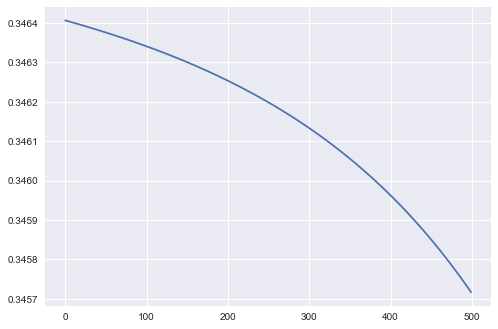

In [158]:
plt.plot(losses)
plt.show()